In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Resources/adult.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,9046,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
1,31112,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
2,60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
3,1665,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
4,56669,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [3]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'govt_worker', 'never_worked',
       'private_worker', 'self_employed', 'rural_residence', 'urban_residence',
       'smoking_unknown', 'former_smoker', 'never_smoked', 'current_smoker'],
      dtype='object')

In [4]:
df.drop(columns=["id"], inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,0.961233,0,1,1,2.579605,0.852506,1,0,0,1,0,0,1,0,1,0,0
1,1,1.692041,0,1,1,-0.036015,0.285758,1,0,0,1,0,1,0,0,0,1,0
2,0,-0.050654,0,0,1,1.355417,0.548398,1,0,0,1,0,0,1,0,0,0,1
3,0,1.635825,1,0,1,1.416989,-0.889207,1,0,0,0,1,1,0,0,0,1,0
4,1,1.748257,0,0,1,1.674567,-0.198051,1,0,0,1,0,0,1,0,1,0,0


In [7]:
#Create our features

X = df.drop(columns=["stroke", "never_worked"])
y = df["stroke"]

In [8]:
y.value_counts()

0    3865
1     208
Name: stroke, dtype: int64

In [12]:
#Balance/resample data set due to heavy imbalance of '0' and '1' values.

from imblearn.over_sampling import SMOTE

os = SMOTE()
X,y = os.fit_resample(X,y)

In [13]:
# Check to see if balanced

y.value_counts()

1    3865
0    3865
Name: stroke, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [16]:
# Fit a Random Forests classifier to the data

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train,y_train)
print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 1.0
Testing Score: 0.9425763062596999


In [17]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances

feature_importances = clf.feature_importances_

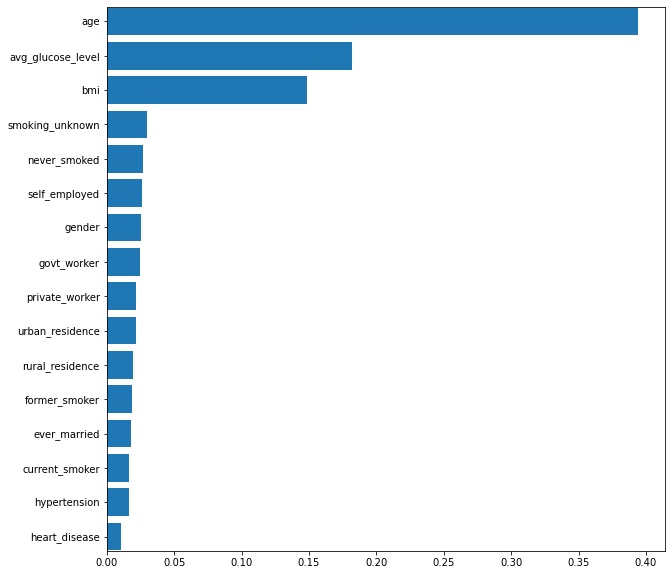

In [18]:
# Plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [19]:
# Create confusion matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[889  86]
 [ 25 933]]


In [20]:
# Extract cm values

tn, fp, fn, tp = cm.ravel()

In [21]:
## Calculate the precision of the model based on the confusion matrix

precision = tp / [tp + fp]
print(f"Precision : {precision}")

Precision : [0.91560353]


In [22]:
# Calculate the sensitivity of the model based on the confusion matrix

sensitivity = tp / [tp + fn]
print(f"Sensitivity: {sensitivity}")

Sensitivity: [0.97390397]


In [23]:
# Calculate the F1 score of the model based on the confusion matrix

f1 = 2*(sensitivity*precision)/(precision+sensitivity)
print(f"F1 : {f1}")

F1 : [0.94385432]


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)

In [25]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8235902741852044


In [28]:
# Create new df to check actual vs predicted values

df_lr = pd.DataFrame()

In [29]:
df_lr["Actual"] = y_test

In [30]:
df_lr["pred"] = y_pred

In [31]:
df_lr.loc[(df_lr["pred"]==1) & (df_lr["Actual"]==1)]

,Actual,pred
6447,1,1
5924,1,1
6054,1,1
4493,1,1
130,1,1
...,...,...
7138,1,1
6861,1,1
6386,1,1
6829,1,1


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[797 178]
 [163 795]]


In [33]:
tn, fp, fn, tp = cm.ravel()

In [34]:
## Calculate the precision of the model based on the confusion matrix

precision = tp / [tp + fp]
print(f"Precision : {precision}")

Precision : [0.81706064]


In [35]:
# Calculate the sensitivity of the model based on the confusion matrix

sensitivity = tp / [tp + fn]
print(f"Sensitivity: {sensitivity}")

Sensitivity: [0.82985386]


In [36]:
# Calculate the F1 score of the model based on the confusion matrix

f1 = 2*(sensitivity*precision)/(precision+sensitivity)
print(f"F1 : {f1}")

F1 : [0.82340756]


# Neural Networks

In [37]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [39]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu", input_dim=16))
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=100)



Epoch 1/100
182/182 [==============================] - 4s 2ms/step - loss: 0.5087 - accuracy: 0.7487
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.7997
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8325
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8525
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8699
Epoch 6/100
182/182 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8805
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.8877
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.8972
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8977
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2428 - accura

182/182 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.9581
Epoch 82/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9576
Epoch 83/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9584
Epoch 84/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9558
Epoch 85/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9548
Epoch 86/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.9612
Epoch 87/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9576
Epoch 88/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9598
Epoch 89/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9610
Epoch 90/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 

In [41]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 1s - loss: 0.2209 - accuracy: 0.9245 - 917ms/epoch - 15ms/step
Loss: 0.22093623876571655, Accuracy: 0.9244697093963623
